In [59]:
import rdkit
from rdkit.Chem import AllChem as Chem
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
with open('data/alpha.smi') as f:
    for line in f:
        if line.startswith('#') or len(line.strip()) == 0:
            continue

In [4]:
line.strip()

'OCCCc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@@H]2O)C\t68712\t8.28'

In [5]:
mol = Chem.MolFromSmiles(line.split()[0])

In [6]:
mol

In [7]:
from rdkit.Chem.Fingerprints import FingerprintMols

In [8]:
paths = Chem.FindAllSubgraphsOfLengthMToN(mol,1,7,useHs=False)

In [9]:
x = Chem.MolFragmentToSmiles(mol, [0,1,6])

In [59]:
sum(paths)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [60]:
mol.GetNumAtoms()

24

In [61]:
paths[0][-1]

(26,)

In [79]:
paths = Chem.FindAllPathsOfLengthN(mol, 7, useBonds=False)

In [80]:
len(paths)

142

In [81]:
list(paths[-1])

[23, 17, 18, 19, 20, 21, 17]

In [111]:
fp = Chem.RDKFingerprint(mol,fpSize=2048)

In [124]:
from rdkit.Chem import MACCSkeys

In [113]:
fp = Chem.GetMorganFingerprint(mol,2)

In [119]:
r = 2
fp = Chem.GetMorganFingerprintAsBitVect(mol,r,nBits=2048)


In [126]:
fp = MACCSkeys.GenMACCSKeys(mol)

In [127]:
fp.ToBitString()

'00000000000000000000000000000000000000000000000000000000000000000010000000000000001000000011000010000100110011001101101000000001110110000001000111110010110101011011110'

In [128]:
help(MACCSkeys.GenMACCSKeys)

Help on built-in function GetMACCSKeysFingerprint in module rdkit.Chem.rdMolDescriptors:

GetMACCSKeysFingerprint(...)
    GetMACCSKeysFingerprint( (Mol)mol) -> ExplicitBitVect :
        Returns the MACCS keys for a molecule as an ExplicitBitVect
    
        C++ signature :
            ExplicitBitVect* GetMACCSKeysFingerprint(RDKit::ROMol)



In [10]:
import pandas as pd

In [230]:
data = pd.read_csv('data/alpha_rdkit_fp.gz',compression='gzip',header=None,delim_whitespace=True)

In [231]:
y = np.array(data.iloc[:,1])
x = np.array(data.iloc[:,2:],dtype=np.float)

In [232]:
x.shape

(3888, 2048)

In [40]:
from sklearn.linear_model import *

In [41]:
lars = LarsCV()

In [42]:
lasso = LassoCV()

In [49]:
lasso.fit(x,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, normalize=False, precompute='auto',
    tol=0.0001, verbose=False)

In [54]:
np.count_nonzero(lasso.coef_)

42

In [55]:
lasso.score(x,y)

0.85141299419897465

In [58]:
p = lasso.predict(x)

In [82]:
np.count_nonzero(lasso.coef_)

42

In [85]:
lars.fit(x.astype(np.float64),y)

LarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
    precompute='auto', verbose=False)

In [88]:
lars.score(x,y)

0.25292941222000931

In [89]:
np.count_nonzero(lars.coef_)

7

In [90]:
ll = LassoLarsCV()

In [91]:
ll.fit(x,y)

/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 328 iterations, i.e. alpha=2.023e-15, with an active set of 66 regressors, and the smallest cholesky pivot element being 5.960e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 331 iterations, i.e. alpha=1.911e-15, with an active set of 67 regressors, and the smallest cholesky pivot element being 2.581e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 332 iterations, i.e. alpha=1.889e-15, with an active set of 68 regressors, and the smallest cholesky pivot element being 8.025e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn

LassoLarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=True, precompute='auto', verbose=False)

In [92]:
ll.score(x,y)

0.7607048705705699

In [93]:
np.count_nonzero(ll.coef_)

33

In [94]:
ll2 = LassoLarsIC()

In [95]:
ll2.fit(x,y)
ll2.score(x,y)

/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 488 iterations, i.e. alpha=7.982e-14, with an active set of 98 regressors, and the smallest cholesky pivot element being 9.714e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 488 iterations, i.e. alpha=7.976e-14, with an active set of 98 regressors, and the smallest cholesky pivot element being 9.714e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 488 iterations, i.e. alpha=7.966e-14, with an active set of 98 regressors, and the smallest cholesky pivot element being 1.490e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn

0.0

In [96]:
np.count_nonzero(ll2.coef_)

0

In [97]:
el = ElasticNetCV()
el.fit(x,y)
el.score(x,y)

0.85899530788623402

In [98]:
np.count_nonzero(el.coef_)

80

In [214]:
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [208]:
method = Lasso()

In [209]:
kf = KFold(len(y), n_folds=4,shuffle=True)
retfit = []
retunfit = []
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    paths = method.path(xtrain,ytrain)
    retfit.append([p.score(xtrain,ytrain) for p in paths])
    retunfit.append([p.score(xtest,ytest) for p in paths])

0.389564593414


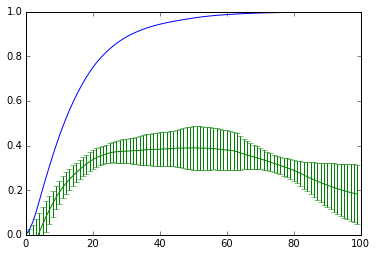

In [210]:
plt.plot(np.mean(np.array(retfit),axis=0))
unfit = np.mean(np.array(retunfit),axis=0)
unfitstd = np.std(np.array(retunfit),axis=0)
plt.errorbar(range(len(unfit)),unfit,yerr=unfitstd)
plt.ylim(0,1)
print np.max(unfit)

In [233]:
lars = LassoLarsCV(cv=5,n_jobs=-1)

In [234]:
lars.fit(x,y)

LassoLarsCV(copy_X=True, cv=5, eps=2.2204460492503131e-16, fit_intercept=True,
      max_iter=500, max_n_alphas=1000, n_jobs=-1, normalize=True,
      precompute='auto', verbose=False)

In [235]:
lars.score(x,y)

0.55966060309253107

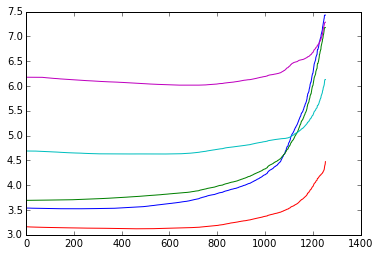

In [236]:
plt.plot(lars.cv_mse_path_)

In [237]:
np.count_nonzero(lars.coef_)

274

In [229]:
kf = KFold(len(y), n_folds=3,shuffle=True)
method = LassoLarsCV(cv=5,n_jobs=-1)
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    method.fit(xtrain,ytrain)
    print method.score(xtest,ytest),np.count_nonzero(method.coef_)

0.375400633361 38
0.299451002592 41
0.390510541857 17


In [134]:
from sklearn.cross_decomposition import PLSRegression

In [238]:
pls = PLSRegression(2)

In [239]:
pls.fit(x,y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [240]:
pls.score(x,y)

0.34139537428948619

In [241]:
kf = KFold(len(y), n_folds=3,shuffle=True)
retfit = []
retunfit = []

for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    fit = []
    unfit = []
    for i in xrange(1,11):
        pls = PLSRegression(i)
        pls.fit(xtrain,ytrain)
        fit.append(pls.score(xtrain,ytrain))
        unfit.append(pls.score(xtest,ytest))
    retfit.append(fit)
    retunfit.append(unfit)

(0, 1)

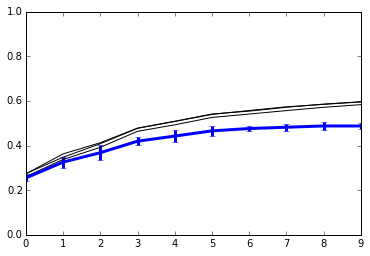

In [242]:
for fit in retfit:
    plt.plot(fit,'k-')

plt.errorbar(range(0,len(retunfit[0])),np.mean(np.array(retunfit),axis=0),yerr=np.std(np.array(retunfit),axis=0),linewidth=3)
plt.ylim(0,1)

In [245]:
ridge = RidgeCV(cv=3)

In [ ]:
ridge.fit(x,y)